<a href="https://colab.research.google.com/github/khadijaraza/spisproject/blob/main/Data_Set_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install lightkurve
# This project makes use of Lightkurve, a Python package for Kepler and TESS data analysis (Lightkurve Collaboration, 2018)

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.6/199.6 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 97.7 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=11c5c82968d60946fc2245d57c9a467a79d5d5742cdd5f476537b0d7066bad5a
  Stored in directory: /root/.cache/pip/wheels/04/15/cd/2f622795b09e83471a3be5d2581cd9cf96a6ec7aa78e8deffe
  Created wheel for memoization

In [36]:
%matplotlib inline
import lightkurve as lk
import numpy as np
from astroquery.mast import Catalogs
import pandas as pd

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

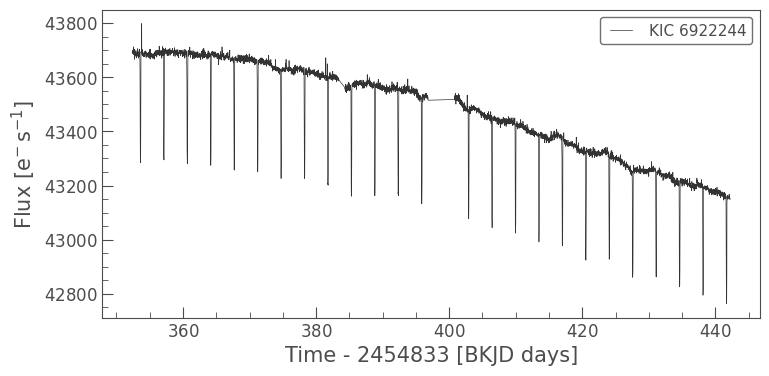

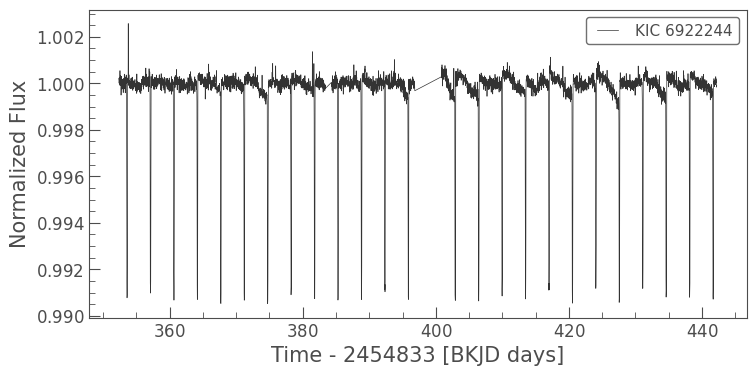

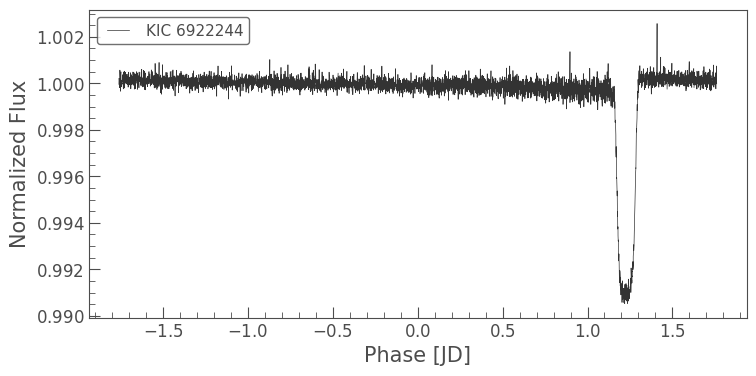

In [6]:
pixelfile = lk.search_targetpixelfile("KIC 6922244", author = "Kepler", cadence="long", quarter=4).download(); #downloads pixel img
#pixelfile.plot(frame=1); #displays pixel img

lc = pixelfile.to_lightcurve(aperture_mask = pixelfile.pipeline_mask); # sums values of relevant pixels (pipeline_mask), converts to light curve
lc.flux # gets numerical values for brightness
lc.plot()

flat_lc = lc.flatten(window_length = 401) #flattens curve
flat_lc.plot()

one_lc = flat_lc.fold(period = 3.5225) #getting one period, or one dip
one_lc.plot()

In [29]:
example_search_result = lk.search_lightcurve("Kepler-8") # gets data from Kepler-8

kepler_long_cadence = example_search_result[(example_search_result.exptime.value > 1000)] # filters data to get higher exposure times = more precise results
print(kepler_long_cadence)


SearchResult containing 29 data products.

 #       mission      year   author   exptime         target_name          distance
                                         s                                  arcsec 
--- ----------------- ---- ---------- ------- ---------------------------- --------
  0 Kepler Quarter 02 2009     Kepler    1800                kplr006922244      0.0
  1 Kepler Quarter 03 2009     Kepler    1800                kplr006922244      0.0
  2 Kepler Quarter 01 2009     Kepler    1800                kplr006922244      0.0
  3 Kepler Quarter 00 2009     Kepler    1800                kplr006922244      0.0
  4 Kepler Quarter 06 2010     Kepler    1800                kplr006922244      0.0
  5 Kepler Quarter 07 2010     Kepler    1800                kplr006922244      0.0
  6 Kepler Quarter 04 2010     Kepler    1800                kplr006922244      0.0
  7 Kepler Quarter 05 2010     Kepler    1800                kplr006922244      0.0
  8 Kepler Quarter 10 2011     Ke

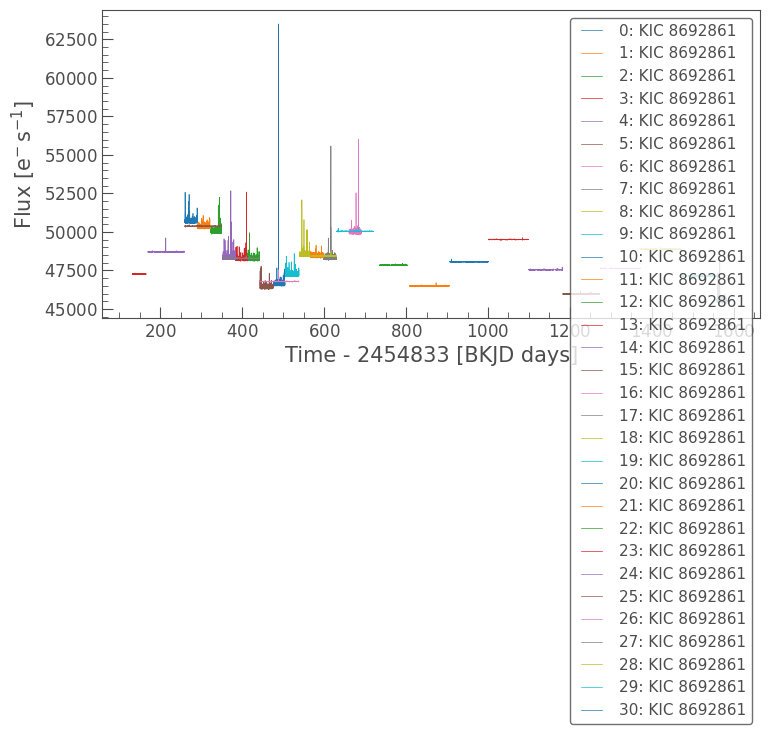

In [35]:
# Search for Kepler observations of Kepler-69
search_result = lk.search_lightcurve('Kepler-69', author = "Kepler")
# Download all available Kepler light curves
lc_collection = search_result.download_all()
lc_collection.plot();